<h1> Navigation </h1>
<a  id="navi"> </a>
<ol>
<li>Manual analysis</li>

[The beginning](#1) <br>

<br>

<li>Dealing with dates</li>

[The beginning](#2) <br>

<br>

<li>Distributions and heatmap</li>

[The beginning](#3) <br>

<br>

<li>Outliers</li>

[The beginning](#4) <br>

<br>

<li>Random Forest</li>

[The beginning](#5) <br>

<br>

<li>Neural network simple</li>

[The beginning](#6) <br>

<br>

<li>Neural network modified</li>

[The beginning](#7) <br>

<br>

<li>XGBoost</li>

[The beginning](#8) <br>

<br>
<li>Stochastic Gradient descent (bad results)</li>

[The beginning](#9) <br>

<br>

<li>Final comparison and visualization</li>

[Go to the end, no more code!](#10) <br>
<br>
</ol>

In [633]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split



from xgboost import XGBRegressor


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [634]:
rng = 42

In [635]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [636]:
df_original = pd.read_csv('FinalHW.csv')
# you need to predict average prices of Avocados in US
# every column might contain important info, its up to you to deal with it
#you MUST use a neural network and test other algorithms such as XGboost, RF or gradientBoosting Regressor etc..
# good luck
# until 19th of December

#data set name is FinalHW. csv
#predict AveragePrice

In [637]:
df_original.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<h3> Manual analysis </h3>


<a  id="1"> </a>
[Back to Navigation](#navi)

In [638]:
df = df_original.copy()
df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" }, inplace=True)

# Let's see nan values
df[df.isna().any(axis=1)]

,Unnamed: 0,Date,AveragePrice,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
58,6,2015-11-15,1.13,339860.68,263915.78,28442.45,455.97,NaN,33656.42,13390.06,0.00,conventional,2015,Atlanta
69,17,2015-08-30,1.15,NaN,275818.27,44839.12,1034.09,61281.24,47138.07,14112.50,30.67,conventional,2015,Atlanta
16135,16,2017-09-10,2.15,9103.32,NaN,2782.28,0.00,6226.66,2482.62,3744.04,0.00,organic,2017,Nashville


In [639]:
# We don't have to remove these nan values because we can calculate them using the other columns
df.loc['58', 'TotalBags'] = df.loc['58', 'SmallBags'] + df.loc['58', 'LargeBags']
df.loc['69', 'TotalVolume'] = df.loc['69', 'Small Hass'] + df.loc['69', 'Large Hass'] + df.loc['69', 'XLarge Hass']
df.loc['16135', 'Small Hass'] = df.loc['16135', 'TotalVolume'] - df.loc['16135', 'Large Hass'] - df.loc['16135', 'XLarge Hass']

In [640]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [641]:
# I found a city-state dictionary. I gonna use it to detect cities in the dataset. At least, a part of them 
# https://github.com/agalea91/city_to_state_dictionary/blob/master/city_to_state.py
from cities_regions import city_to_state_dict

def delete_spaces(s):
    return s.replace(' ', '')


# make the keys in the imported dictionary the same with the cities in the dataset
city_state = dict()
for key in city_to_state_dict:
    city_state[key.replace(' ', '')] = city_to_state_dict[key].replace(' ', '')


cities_california = []
cities = []
for region in df['region'].unique():
    if region in city_state.keys():
        # print(city_state[region])
        cities.append(region)
        # to sum values for California to compare TotalVolumes
        if city_state[region] == 'California':
            cities_california.append(region)
        pass
    else:
        print(f"It's a region/state or a couple of cities { region }")
        pass



# California, Midsouth, NewYork, Northeast, NorthernNewEngland, SouthCarolina, SouthCentral, Southeast, 
# West, Greate Lakes, Planes will be deleted. 

# The others are a couple of cities or a realy small region

It's a region/state or a couple of cities BaltimoreWashington
It's a region/state or a couple of cities BuffaloRochester
It's a region/state or a couple of cities California
It's a region/state or a couple of cities CincinnatiDayton
It's a region/state or a couple of cities DallasFtWorth
It's a region/state or a couple of cities GreatLakes
It's a region/state or a couple of cities HarrisburgScranton
It's a region/state or a couple of cities HartfordSpringfield
It's a region/state or a couple of cities MiamiFtLauderdale
It's a region/state or a couple of cities Midsouth
It's a region/state or a couple of cities NewOrleansMobile
It's a region/state or a couple of cities NewYork
It's a region/state or a couple of cities Northeast
It's a region/state or a couple of cities NorthernNewEngland
It's a region/state or a couple of cities PhoenixTucson
It's a region/state or a couple of cities Plains
It's a region/state or a couple of cities RaleighGreensboro
It's a region/state or a couple of ci

In [642]:
print(sum(df.loc[df['region'].isin(cities_california)].groupby(['region']).sum()['TotalVolume']))
print(sum(df.loc[df['region'] == 'California'].groupby(['region']).sum()['TotalVolume']))

# The sum of the cities in California isn't equal to a total volume of California. It's not good. I suppose that it would be true for every region/state
# I think that the great way to manage this is to create different rows for the existing cities and the other cities in the state. 
# For example, LasAngeles, Sacramento, SanDiego, SanFrancisco, and the others of California state...

808682405.96
1028981653.17


C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\1665024223.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(sum(df.loc[df['region'].isin(cities_california)].groupby(['region']).sum()['TotalVolume']))
C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\1665024223.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(sum(df.loc[df['region'] == 'California'].groupby(['region']).sum()['TotalVolume']))


In [643]:
# For now we have to decide what to keep. I think that the cities are more 
# important so I'll delete all states and regions at the beginning. Anyway, 
# if a dataset is good
# enough, a sum of total volumes of the cities in the specific state should 
# be equal to a total volume of the states. Plus, it's better to predict
# a price in the city instead of a price in the state

# On the other hand, combining the cities into the regions creates 
# less categories which is probably better to get decent results... 
# 
# However, let's focus on the cities

In [644]:
# Our list of states/regions:
# big_regions = ['California' , 'Midsouth', 'Northeast', 'NorthernNewEngland', 'SouthCarolina', 'SouthCentral', 'Southeast', 'West', 
#             'TotalUS', 'GreatLakes', 'Plains']

big_regions_rows = df.loc[df['region'].isin(cities)].index
df1 = df.drop(big_regions_rows, axis=0)
df1

,Unnamed: 0,Date,AveragePrice,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
104,0,2015-12-27,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington
105,1,2015-12-20,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington
106,2,2015-12-13,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington
107,3,2015-12-06,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington
108,4,2015-11-29,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<h3> Dealing with dates </h3>


<a  id="2"> </a>
[Back to Navigation](#navi)

In [645]:
# I think that months could be important. After adding them we can delete
# the Date column because we have years in the other one
df2 = df1.copy()

In [646]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [647]:
df2['Date'][0].month

12

In [648]:
month = {1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'	}

df2['month'] = [month[df2['Date'][i].month] for i in df2.index]
df2.drop(['Date'], axis=1, inplace=True)
df2

,Unnamed: 0,AveragePrice,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
104,0,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington,December
105,1,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington,December
106,2,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington,December
107,3,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington,December
108,4,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,February
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,January
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,January
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,January


In [649]:
df2.rename({'AveragePrice' : 'Target'}, axis=1, inplace=True)
df2

,Unnamed: 0,Target,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
104,0,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington,December
105,1,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington,December
106,2,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington,December
107,3,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington,December
108,4,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,February
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,January
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,January
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,January


<h3> Distributions and heatmap </h3>


<a  id="3"> </a>
[Back to Navigation](#navi)

In [650]:
df2

,Unnamed: 0,Target,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
104,0,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington,December
105,1,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington,December
106,2,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington,December
107,3,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington,December
108,4,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,February
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,January
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,January
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,January


In [651]:
df2.columns

Index(['Unnamed: 0', 'Target', 'TotalVolume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags',
       'type', 'year', 'region', 'month'],
      dtype='object')

In [652]:
def print_distrubutions(df, hist_in_row):
    rows, cols = (len(df2.columns) // hist_in_row + 1), hist_in_row
    fig, axs = plt.subplots(rows, cols, figsize = (10*hist_in_row, 10))
    fig.tight_layout()
    for row in range(rows):
        for col in range(cols):
            if hist_in_row*row + col == len(df2.columns):
                break
            axs[row, col].hist(df2.iloc[:, hist_in_row*row + col], bins=10)
            axs[row, col].set_title(df2.columns[hist_in_row*row + col], fontweight = "bold")
    plt.show()


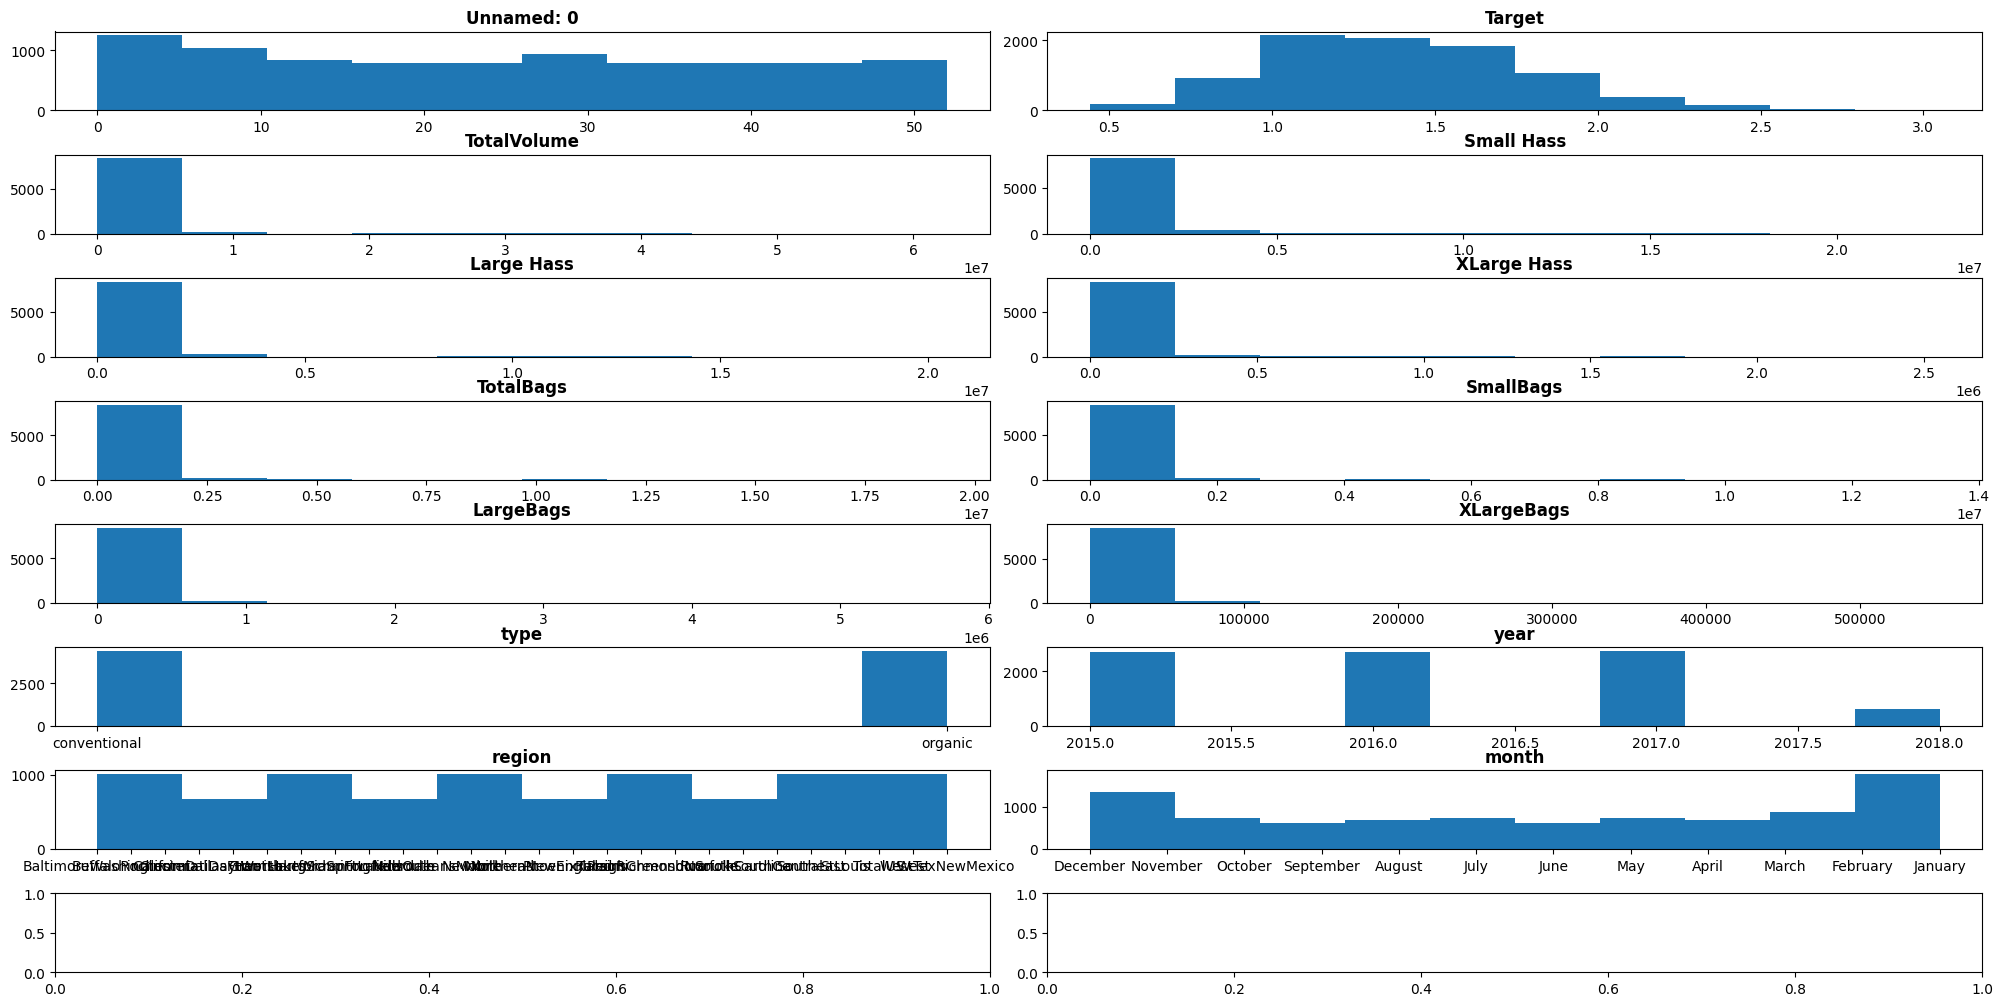

In [653]:
print_distrubutions(df2, 2)


# As we see, there are some outliers in the Hass and Bags columns.

In [654]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\4264062760.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = train_data.corr()


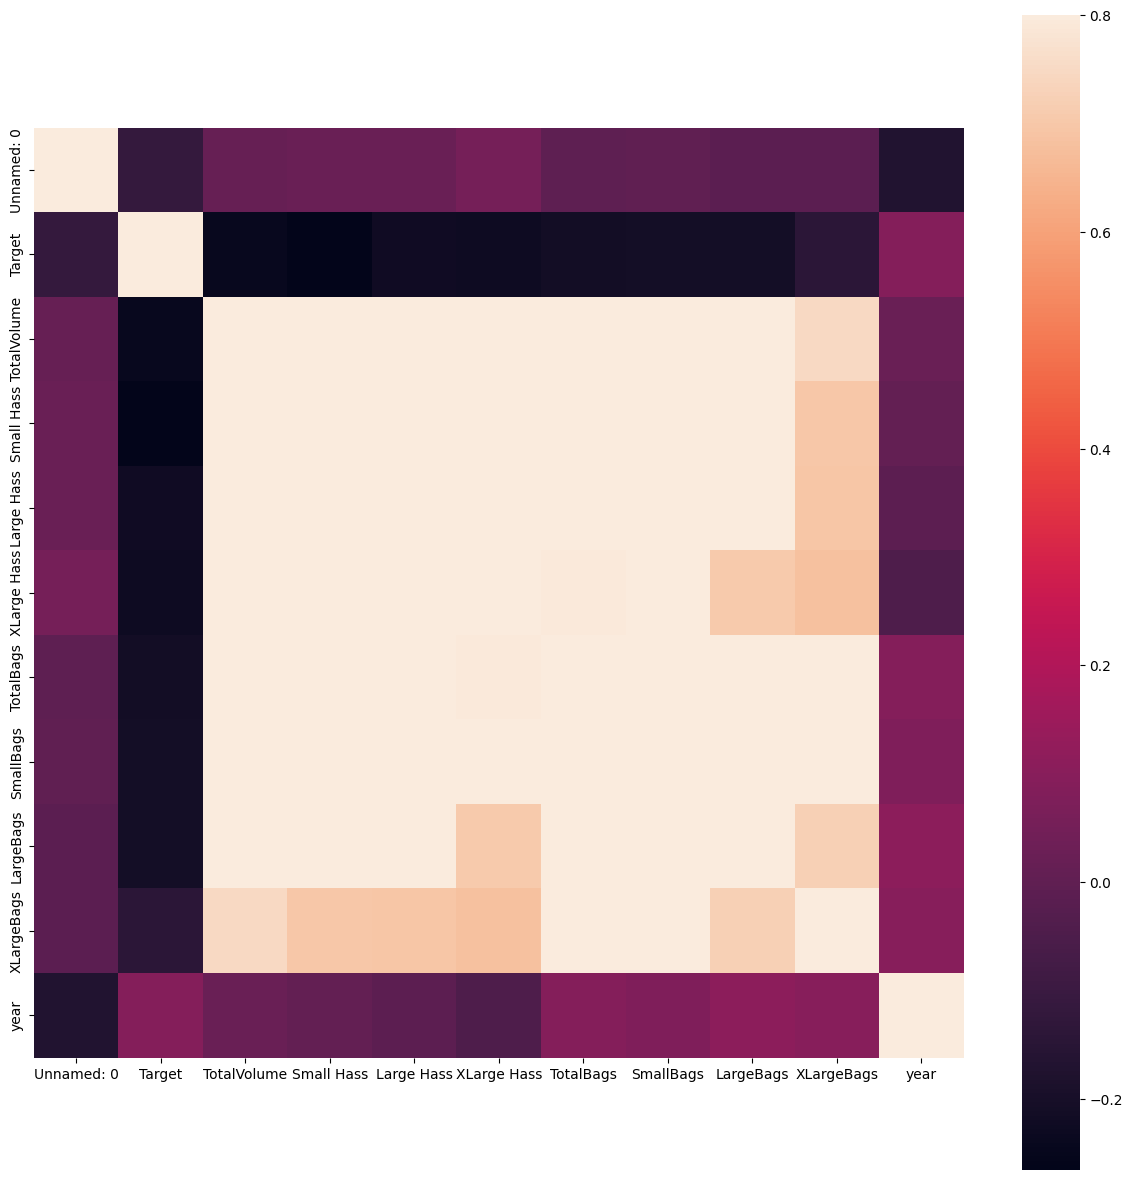

In [655]:
num_cols = get_cols_with_no_nans(df2 , 'num')
cat_cols = get_cols_with_no_nans(df2 , 'no_num')


train_data = df2[num_cols + cat_cols]
train_data['Target'] = df2['Target']

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

# Correlation between the Target and the other values is strong enough.

<h3> Outliers </h3>


<a  id="4"> </a>
[Back to Navigation](#navi)

In [656]:
# I'm going to detect outliers in TotalVolume and TotalBags columns
# In that time, I use a simple quantile method. It helps me to delete 
# significant outliers

In [657]:
df2

,Unnamed: 0,Target,TotalVolume,Small Hass,Large Hass,XLarge Hass,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month
104,0,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.0,conventional,2015,BaltimoreWashington,December
105,1,1.11,642682.40,44741.37,434590.82,19112.14,144238.07,141751.91,2486.16,0.0,conventional,2015,BaltimoreWashington,December
106,2,1.15,619509.33,44400.26,399851.59,24291.20,150966.28,149070.40,1895.88,0.0,conventional,2015,BaltimoreWashington,December
107,3,1.04,649141.25,51129.29,453586.50,25760.49,118664.97,117112.77,1552.20,0.0,conventional,2015,BaltimoreWashington,December
108,4,1.16,545800.05,41028.15,379156.09,20147.53,105468.28,103615.95,1852.33,0.0,conventional,2015,BaltimoreWashington,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,February
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,January
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,January
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,January


In [658]:
def delete_outliers_quantile(df_original, columns, percent): 
    df = df_original.copy()
    for col in columns: 
        percentiles = df[col].quantile([percent, 1 - percent]).values 
        df = df.loc[df[col] >= percentiles[0]]  
        df = df.loc[df[col] <= percentiles[1]]  
    return df

In [659]:
columns_outliers = ['TotalVolume', 'TotalBags']
df_less_outliers = delete_outliers_quantile(df2, columns_outliers, 0.01)

<h3> Categorical data </h3>

In [660]:
def use_ohe(df, features):
    df_local = df.copy()
    for feature in features:
        ohe = OneHotEncoder()
        transformed = ohe.fit_transform(df[[feature]])
        df_local[ohe.categories_[0]] = transformed.toarray()
    return df_local

In [661]:
for_ohe = ['region', 'month', 'type', 'year']

df_ohe = use_ohe(df2, for_ohe)
df_ohe.drop(for_ohe, axis=1, inplace=True)

In [662]:
for_ohe = ['region', 'month', 'type', 'year']

df_ohe_less_outliers = use_ohe(df_less_outliers, for_ohe)
df_ohe_less_outliers.drop(for_ohe, axis=1, inplace=True)

In [663]:
# TotalVolume is a sum of small, large, and xlarge hass. The same for TotalBags.
df_ohe.drop(['Small Hass', 'Large Hass', 'XLarge Hass',
            'SmallBags', 'LargeBags', 'XLargeBags', 'Unnamed: 0'], axis = 1, inplace = True)
df_ohe_less_outliers.drop(['Small Hass', 'Large Hass', 'XLarge Hass',
            'SmallBags', 'LargeBags', 'XLargeBags', 'Unnamed: 0'], axis = 1, inplace = True)




In [664]:
df_results = pd.DataFrame(columns=['MSE', 'R2 Square'])
df_results

,MSE,R2 Square


<h3> Models </h3>

<h4> RandomForestRegressor </h4>


<a  id="5"> </a>
[Back to Navigation](#navi)

In [665]:
# For RandomForestRegressor we don't really need to do anything with outliers

In [666]:
from sklearn.model_selection import train_test_split

x = df_ohe.iloc[:, 1:]
y = df_ohe.iloc[:, 0]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=rng)

In [667]:
from sklearn.ensemble import RandomForestRegressor

set_of_estimators = [estimators for estimators in np.arange(50, 5511, 50)]

max_r2 = 0
best_est = 300
for est in set_of_estimators:
    rf_reg = RandomForestRegressor(n_estimators=est, random_state=rng)
    rf_reg.fit(X_train, y_train)

    test_pred = rf_reg.predict(X_test)

    if max_r2 < metrics.r2_score(y_test, test_pred):
        max_r2 = metrics.r2_score(y_test, test_pred)
        best_est = est


In [668]:
print(f'The number of estimators: { best_est }')

rf_reg = RandomForestRegressor(n_estimators=best_est, random_state=rng)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


df_results.append([metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)])



print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)

The number of estimators: 300


c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


Testing set evaluation:
______
MAE: 0.07707010055018024
MSE: 0.012064230016442174
RMSE: 0.10983728882507149
R2 Square 0.9231739063889849
______
==*******==
Training set evaluation:
_____
MAE: 0.02864617245304501
MSE: 0.0017194903106621184
RMSE: 0.041466737400742276
R2 Square 0.9886326764518104
______


C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\656345435.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results.append([metrics.mean_squared_error(y_test, test_pred),


In [669]:
df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)]],
                            columns=df_results.columns,
                            index =['Random Forest']))

C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\935677430.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),


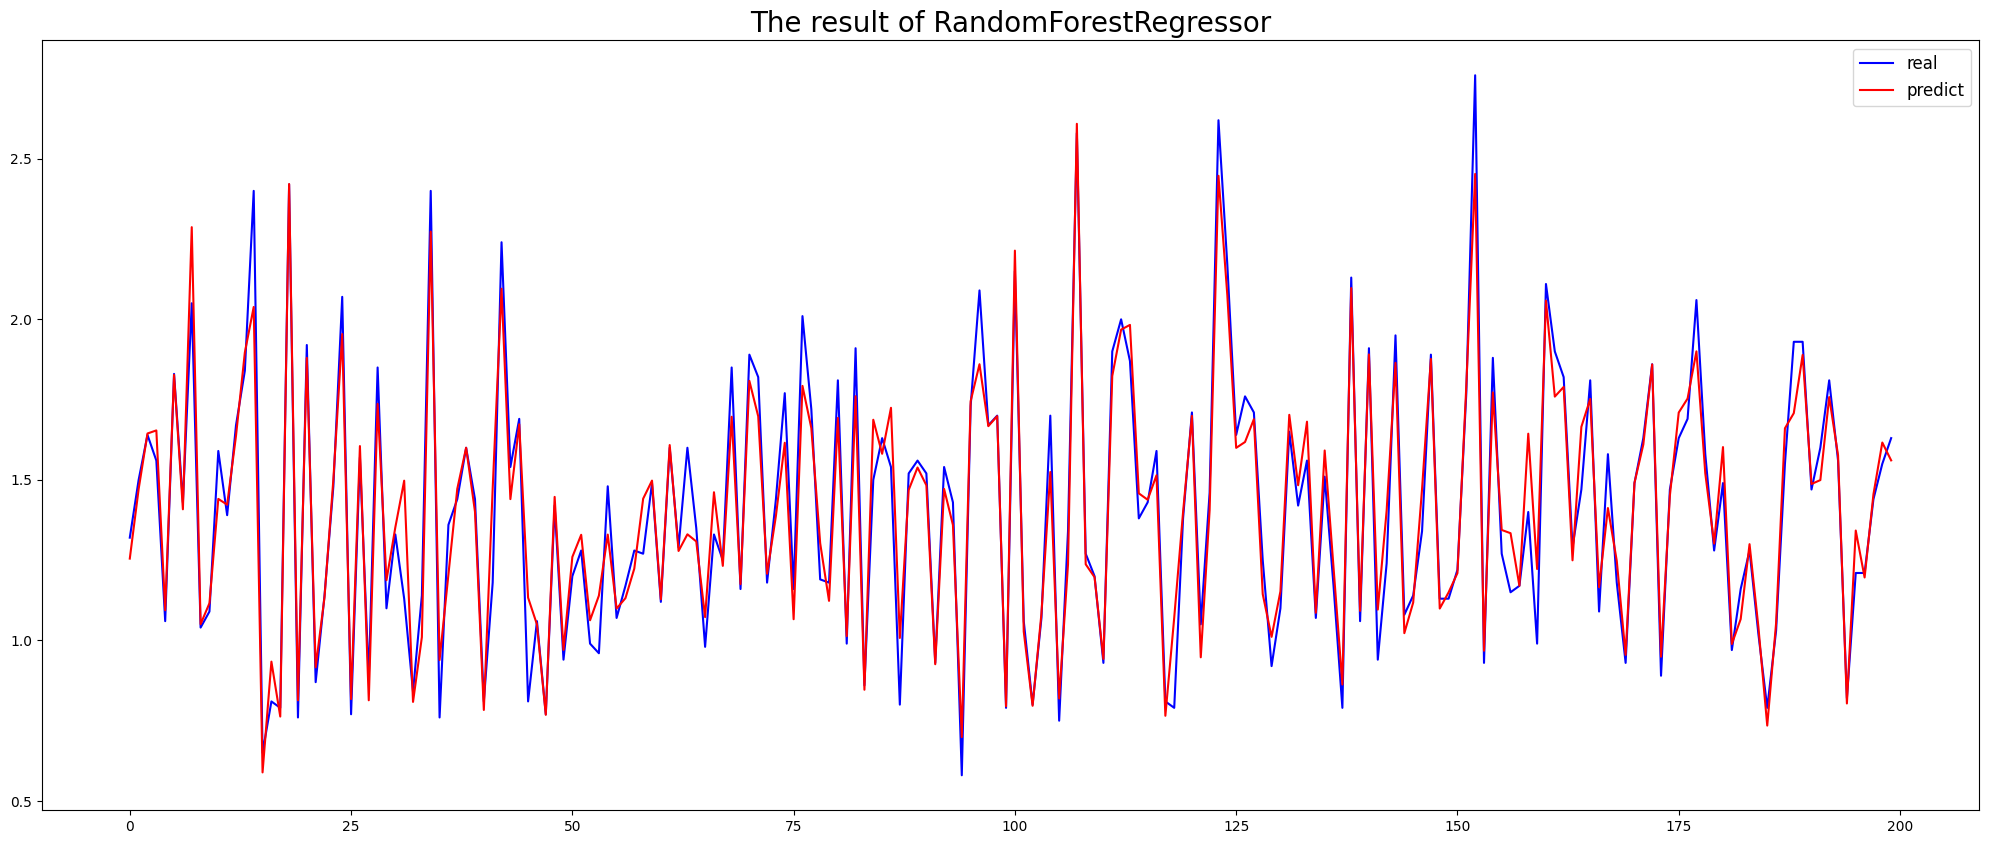

In [670]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(test_pred[:200],c='red')
plt.legend(['real','predict'],fontsize="large")
plt.title(f'The result of RandomForestRegressor', fontsize=20)
plt.show()

<h3> Neural Network </h3>


<a  id="6"> </a>
[Back to Navigation](#navi)

In [671]:
from sklearn.model_selection import train_test_split

# I tested neural network using both the df_ohe and df_ohe_less_outliers datasets
# The latter shows better results

x = df_ohe_less_outliers.iloc[:, 1:]
y = df_ohe_less_outliers.iloc[:, 0]


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=rng)

In [672]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [673]:
# Firstly let's try a simple neural network.
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam',
                metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               6016      
                                                                 
 dense_97 (Dense)            (None, 128)               16512     
                                                                 
 dense_98 (Dense)            (None, 1)                 129       
                                                                 
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [674]:
# Add earlystop not to wait all epochs

earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, 
                        patience=10, verbose=1, mode='auto')

callbacks_list = [earlystop]

model = NN_model.fit(X_train, y_train, epochs=200, batch_size=16, 
                    validation_split = 0.2, callbacks=callbacks_list,
                    verbose=0)

Epoch 31: early stopping


In [675]:
test_pred = NN_model.predict(X_test)
train_pred = NN_model.predict(X_train)

df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)]],
                            columns=df_results.columns,
                            index =['NN simple']))


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)

211/211 [==============================] - 0s 1ms/step
Testing set evaluation:
______
MAE: 0.09527301152782745
MSE: 0.01890167093911471
RMSE: 0.1374833478611672
R2 Square 0.8817207615269745
______
==*******==
Training set evaluation:
_____
MAE: 0.07969624423881784
MSE: 0.012665455000144403
RMSE: 0.1125409036757054
R2 Square 0.9136946080334376
______


C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\3554852263.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),


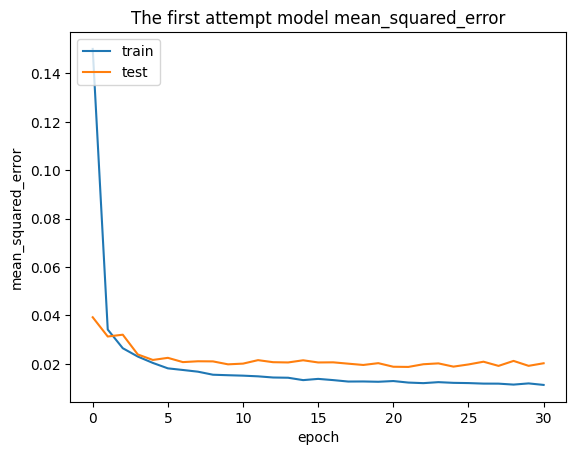

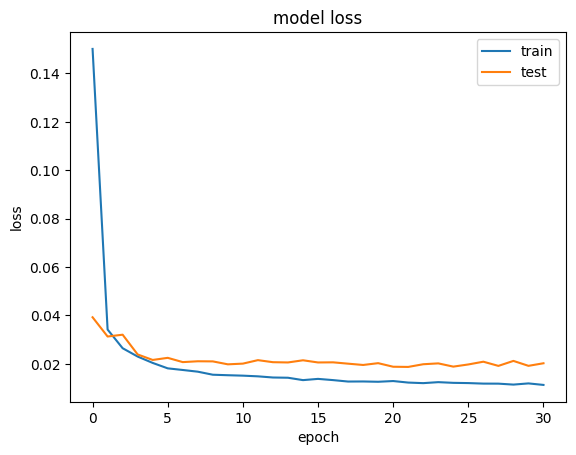

In [676]:
# print(model.history.keys())

list_metrics = ['mean_squared_error']

for metric in list_metrics:
    plt.plot(model.history[metric])
    plt.plot(model.history['val_' + metric])
    plt.title(f'The first attempt model {metric}')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


<h3> Neural Network modified </h3>


<a  id="7"> </a>
[Back to Navigation](#navi)

In [677]:
#  After the previous NN I've tried different structures, loss funtions (mse, huber), 
# and optimizers (adam and sgd). The variant bellow gets the the best result.  

# I tried out to add a Dropout layer, but results become unstable

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='selu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal', activation='selu'))
NN_model.add(Dense(64, kernel_initializer='normal', activation='selu'))
NN_model.add(Dense(32, kernel_initializer='normal', activation='selu'))
NN_model.add(Dense(16, kernel_initializer='normal', activation='selu'))
NN_model.add(Dense(8, kernel_initializer='normal', activation='selu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='huber', optimizer='adam',
                metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 128)               6016      
                                                                 
 dense_100 (Dense)           (None, 128)               16512     
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dense_102 (Dense)           (None, 32)                2080      
                                                                 
 dense_103 (Dense)           (None, 16)                528       
                                                                 
 dense_104 (Dense)           (None, 8)                 136       
                                                                 
 dense_105 (Dense)           (None, 1)               

In [678]:
# Add earlystop not to wait all epochs

earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, 
                        patience=10, verbose=1, mode='auto')

callbacks_list = [earlystop]

model = NN_model.fit(X_train, y_train, epochs=200, batch_size=16, 
                    validation_split = 0.2, callbacks=callbacks_list,
                    verbose=0)

Epoch 50: early stopping


In [679]:
test_pred = NN_model.predict(X_test)
train_pred = NN_model.predict(X_train)

df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)]],
                            columns=df_results.columns,
                            index =['NN modified']))


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)

211/211 [==============================] - 0s 1ms/step
Testing set evaluation:
______
MAE: 0.09244075305940982
MSE: 0.017371411677867217
RMSE: 0.13180065128013296
R2 Square 0.891296523409068
______
==*******==
Training set evaluation:
_____
MAE: 0.0851622875290081
MSE: 0.014405648026547622
RMSE: 0.1200235311368051
R2 Square 0.9018365230898255
______


C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\4099302890.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),


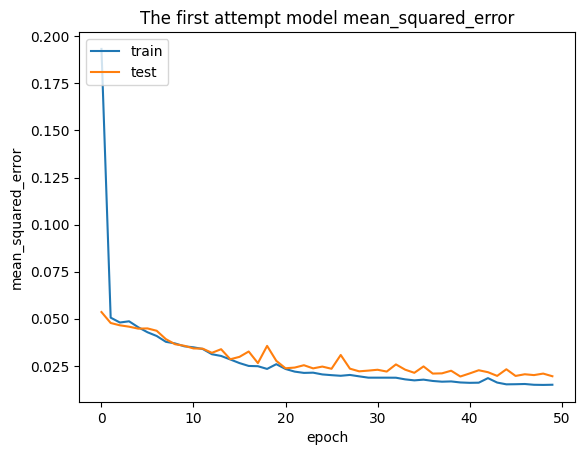

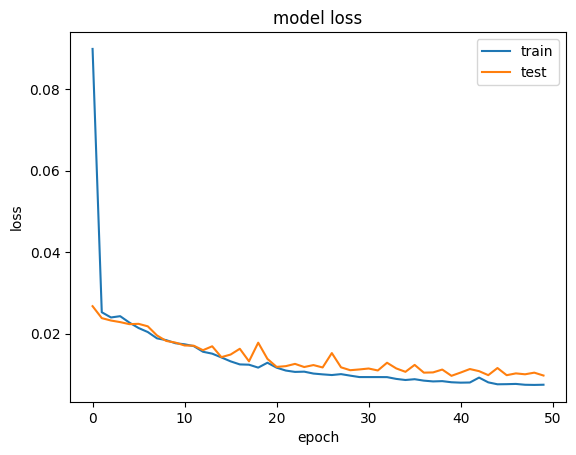

In [680]:
# print(model.history.keys())

list_metrics = ['mean_squared_error']

for metric in list_metrics:
    plt.plot(model.history[metric])
    plt.plot(model.history['val_' + metric])
    plt.title(f'The first attempt model {metric}')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [681]:
# That's an example how I went over different parameters

# for loss in ['mean_squared_error', 'huber']:
#     for optimizer in ['adam', 'sgd']:
#         for activator in ['relu', 'selu']:
#                 print(f"Loss {loss}, optimizer {optimizer}, activator {activator}")
#                 NN_model = Sequential()

#                 # The Input Layer :
#                 NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='selu'))

#                 # The Hidden Layers :
#                 NN_model.add(Dense(128, kernel_initializer='normal', activation='selu'))
#                 NN_model.add(Dense(64, kernel_initializer='normal', activation='selu'))
#                 NN_model.add(Dense(32, kernel_initializer='normal', activation='selu'))
#                 NN_model.add(Dense(16, kernel_initializer='normal', activation='selu'))
#                 NN_model.add(Dense(8, kernel_initializer='normal', activation='selu'))
#                 # The Output Layer :
                
#                 NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#                 # Compile the network :
#                 NN_model.compile(loss=loss, optimizer=optimizer,
#                                 metrics=['mean_squared_error'])


#                 # Add earlystop not to wait all epochs

#                 earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, 
#                                         patience=15, verbose=1, mode='auto')

#                 callbacks_list = [earlystop]

#                 model = NN_model.fit(X_train, y_train, epochs=200, batch_size=16, 
#                                     validation_split = 0.2, callbacks=callbacks_list,
#                                     verbose=0)


#                 print(NN_model.evaluate(X_test, y_test))
#                 print('==*******==')


<h3> XGboost </h3>


<a  id="8"> </a>
[Back to Navigation](#navi)

In [682]:
from sklearn.model_selection import train_test_split

x = df_ohe.iloc[:, 1:]
y = df_ohe.iloc[:, 0]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=rng)

In [683]:
depths = [i for i in np.arange(1, 15)]

# Tested different eta, gamma and lambda. Standard values are the best
# However, max_depth and n_etimators can be fine-tuned

max_r2 = 0
best_max_depth = 8
for depth in depths:
    XGBModel = XGBRegressor(max_depth=depth, random_state=rng)
    XGBModel.fit(X_train, y_train, verbose=False)

    test_pred = XGBModel.predict(X_test)

    if max_r2 < metrics.r2_score(y_test, test_pred):
        max_r2 = metrics.r2_score(y_test, test_pred)
        best_max_depth = depth

In [684]:
mas_n_estimators = [i for i in np.arange(50, 551, 50)]

max_r2 = 0
best_n_estimators = 100
for n_estimators in mas_n_estimators:
    XGBModel = XGBRegressor(max_depth=best_max_depth, n_estimators=n_estimators, 
                            random_state=rng)
    XGBModel.fit(X_train, y_train, verbose=False)

    test_pred = XGBModel.predict(X_test)

    if max_r2 < metrics.r2_score(y_test, test_pred):
        max_r2 = metrics.r2_score(y_test, test_pred)
        best_n_estimators = n_estimators

In [685]:
print(f'The best max depth: { best_max_depth }')
print(f'The best n_estimators: { best_n_estimators }')

XGBModel = XGBRegressor(max_depth=depth, n_estimators=best_n_estimators, 
                        random_state=rng)
XGBModel.fit(X_train, y_train, verbose=False)

test_pred = XGBModel.predict(X_test)
train_pred = XGBModel.predict(X_train)

df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)]],
                            columns=df_results.columns,
                            index =['XGBoost']))


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)


The best max depth: 9
The best n_estimators: 100
Testing set evaluation:
______
MAE: 0.07477500573436713
MSE: 0.011505985580390576
RMSE: 0.10726595722963822
R2 Square 0.9267288567872679
______
==*******==
Training set evaluation:
_____
MAE: 0.0037475617049292633
MSE: 3.287615591113519e-05
RMSE: 0.0057337732699449485
R2 Square 0.9997826600714494
______


C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\1289234003.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),


<h4> Stochastic Gradient descent </h4>

<a  id="9"> </a>
[Back to Navigation](#navi)

In [686]:
x = df_ohe_less_outliers.iloc[:, 1:]
y = df_ohe_less_outliers.iloc[:, 0]


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=rng)

In [687]:
# I tried different parameters. The only one which gives some improvements is
# learning_rate='adaptive'

# I also found an interesting way to use scaling

sgd_reg = make_pipeline(StandardScaler(), 
                SGDRegressor(learning_rate='adaptive', random_state=rng))
sgd_reg.fit(X_train, y_train)

c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(learning_rate='adaptive', random_state=42))])

In [688]:
# The result isn't good though

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),
                            metrics.r2_score(y_test, test_pred)]],
                            columns=df_results.columns,
                            index =['Stochastic Gradient Decent']))


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)

Testing set evaluation:
______
MAE: 0.16733175604821546
MSE: 0.04988022604450512
RMSE: 0.22333881446023915
R2 Square 0.6878691217083073
______
==*******==
Training set evaluation:
_____
MAE: 0.1600510653369663
MSE: 0.04552193209600138
RMSE: 0.213358693509314
R2 Square 0.6898028383049921
______


c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Василий\AppData\Local\Temp\ipykernel_13368\4194759291.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(pd.DataFrame([[metrics.mean_squared_error(y_test, test_pred),


<h3> Final comparison </h3>

<a  id="10"> </a>
[Back to Navigation](#navi)

In [689]:
df_results

,MSE,R2 Square
Random Forest,0.012064,0.923174
NN simple,0.018902,0.881721
NN modified,0.017371,0.891297
XGBoost,0.011506,0.926729
Stochastic Gradient Decent,0.049880,0.687869


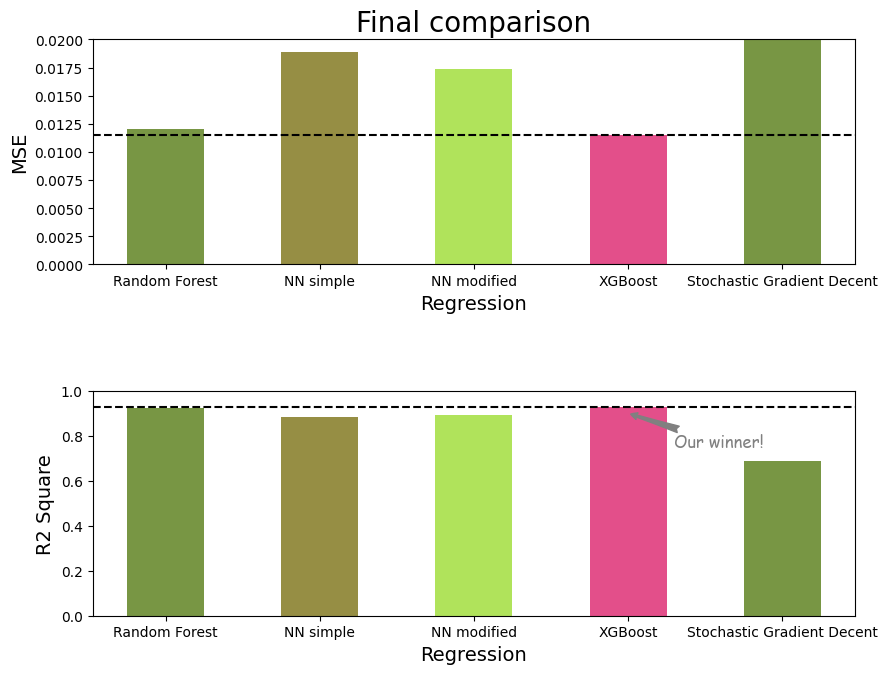

In [693]:
import warnings
warnings.filterwarnings('ignore')

width = 0.5

fig, axes = plt.subplots(2, 1, figsize = (10,8))

colors = ['#789644','#968E44', '#B0E35B', '#E34F8A']

fig.tight_layout(pad=7)
axes[0].set_title('Final comparison', fontsize = 20)
axes[0].bar(df_results.index, df_results['MSE'], color=colors, width=width)
axes[0].set_xticklabels(df_results.index)
axes[0].set_xlabel('Regression', fontsize = 14)
axes[0].set_ylabel('MSE', fontsize=14)
axes[0].axhline(y = min(df_results['MSE']), color = 'k', linestyle = '--')
axes[0].set_ylim(0, 0.02)


axes[1].bar(df_results.index, df_results['R2 Square'], color=colors, width=width)
axes[1].set_xticklabels(df_results.index)
axes[1].set_ylabel('R2 Square', fontsize = 14)
axes[1].set_xlabel('Regression', fontsize = 14)
axes[1].axhline(y = max(df_results['R2 Square']), color = 'k', linestyle = '--')
axes[1].set_ylim(0, 1)
axes[1].annotate('Our winner!', xy=(3, 0.9), 
            xytext=(3.3, 0.75),
            arrowprops=dict(arrowstyle='fancy', color='grey'),
            fontsize = 12,
            fontname='Comic Sans MS',
            color='grey'
            )

plt.show()